In [ ]:
# import datset
from google.colab import files
uploaded = files.upload()

Saving earthquake data.csv to earthquake data (1).csv


In [ ]:
# import libriries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [ ]:
df= pd.read_csv(io.BytesIO(uploaded['earthquake data (1).csv']))
df

,Date & Time,Latitude,Longitude,Depth,Magnitude,Lands,Country
0,11/21/2023 17:43,31.592,-104.549,3,2.7,WESTERN,TEXAS
1,11/21/2023 17:31,-24.200,-67.580,198,4.0,"SALTA,",ARGENTINA
2,11/21/2023 17:27,31.647,-104.017,5,2.9,WESTERN,TEXAS
3,11/21/2023 17:01,46.345,13.601,0,0.8,SLOVENIA,SLOVENIA
4,11/21/2023 16:56,-4.320,130.810,10,3.3,BANDA,SEA
...,...,...,...,...,...,...,...
53534,5/14/2023 9:50,18.080,-103.270,7,3.5,"OFFSHORE, MICHOACAN,",MEXICO
53535,5/14/2023 9:49,11.520,141.620,10,5.1,"STATE, OF, YAP,",MICRONESIA
53536,5/14/2023 9:48,19.400,-155.240,2,2.2,"ISLAND, OF, HAWAII,",HAWAII
53537,5/14/2023 9:28,15.890,-93.520,106,3.9,"CHIAPAS,",MEXICO


In [ ]:
df.dtypes

Date & Time     object
Latitude       float64
Longitude      float64
Depth            int64
Magnitude      float64
Lands           object
Country         object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53539 entries, 0 to 53538
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date & Time  53539 non-null  object 
 1   Latitude     53539 non-null  float64
 2   Longitude    53539 non-null  float64
 3   Depth        53539 non-null  int64  
 4   Magnitude    53539 non-null  float64
 5   Lands        53539 non-null  object 
 6   Country      53539 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 2.9+ MB


In [ ]:
df.describe()

,Latitude,Longitude,Depth,Magnitude
count,53539.000000,53539.000000,53539.000000,53539.000000
mean,21.120630,-15.421862,35.799959,2.962569
std,25.645429,93.129891,67.580186,0.893910
min,-65.899000,-179.992000,-4.000000,-0.700000
25%,8.485000,-94.570000,6.000000,2.300000
50%,29.320000,-8.373000,10.000000,2.900000
75%,38.470000,37.460000,32.000000,3.500000
max,85.330000,180.000000,750.000000,7.700000


In [ ]:
print(df.isnull().sum())


Date & Time    0
Latitude       0
Longitude      0
Depth          0
Magnitude      0
Lands          0
Country        0
dtype: int64


In [ ]:
# temporal trends
df['Date & Time'] = pd.to_datetime(df['Date & Time'])


In [ ]:
df['Month'] = df['Date & Time'].dt.month
df['Weekday'] = df['Date & Time'].dt.weekday
df['Hour'] = df['Date & Time'].dt.hour

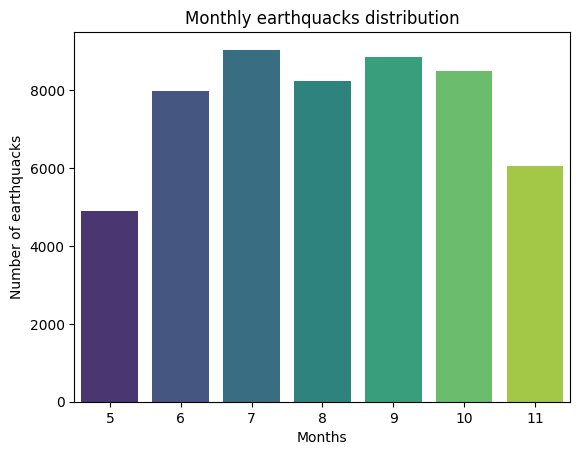

In [ ]:
# Monthly earthquacks distribution
sns.countplot(x='Month', data= df, palette='viridis')
plt.xlabel('Months')
plt.ylabel('Number of earthquacks')
plt.title('Monthly earthquacks distribution')
plt.show()

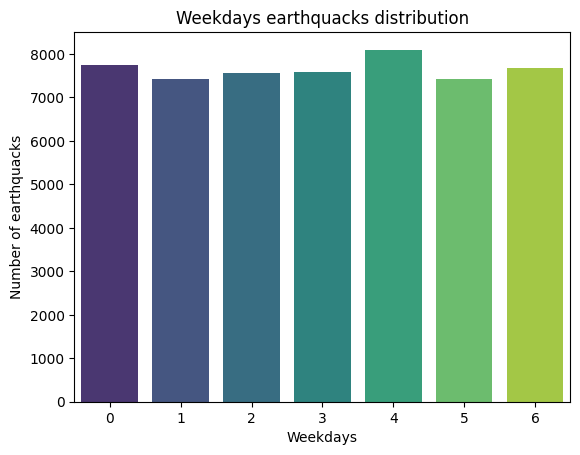

In [ ]:
# Weekdays earthquacks distribution
sns.countplot(x='Weekday', data= df, palette='viridis')
plt.xlabel('Weekdays')
plt.ylabel('Number of earthquacks')
plt.title('Weekdays earthquacks distribution')
plt.show()

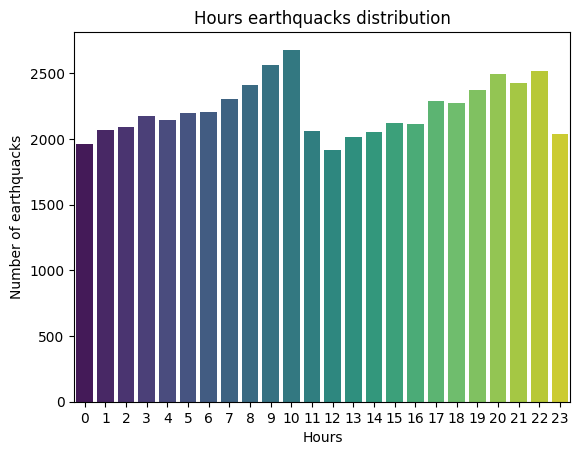

In [ ]:
# Hourly earthquacks distribution
sns.countplot(x='Hour', data= df, palette='viridis')
plt.xlabel('Hours')
plt.ylabel('Number of earthquacks')
plt.title('Hours earthquacks distribution')
plt.show()

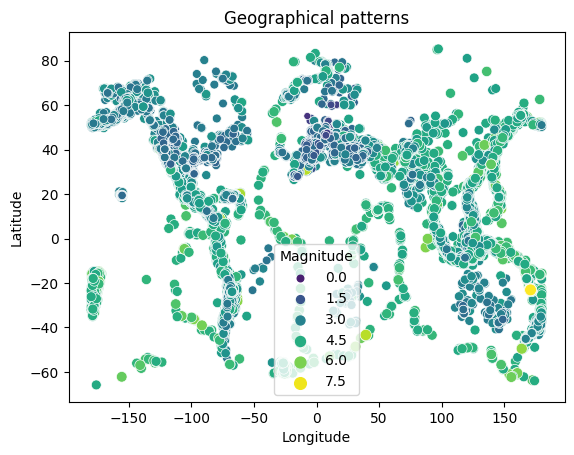

In [ ]:
# Geographical patterns
sns.scatterplot(x='Longitude', y='Latitude', data=df, hue = 'Magnitude', palette= 'viridis', size= 'Magnitude')
plt.title('Geographical patterns')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

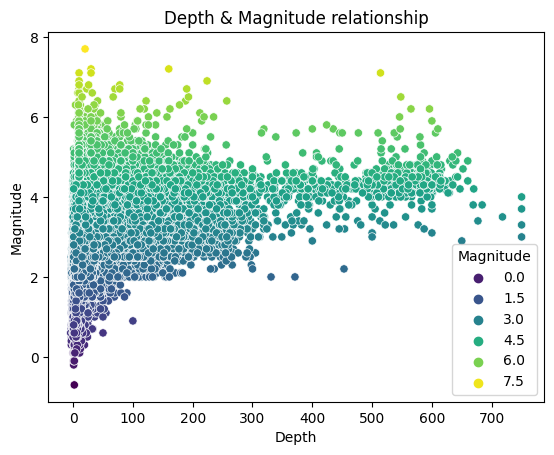

In [ ]:
# Depth & Magnitude relationship
sns.scatterplot(x='Depth', y='Magnitude', data= df, hue = 'Magnitude' , palette = 'viridis' )
plt.title('Depth & Magnitude relationship')
plt.xlabel('Depth')
plt.ylabel('Magnitude')
plt.show()


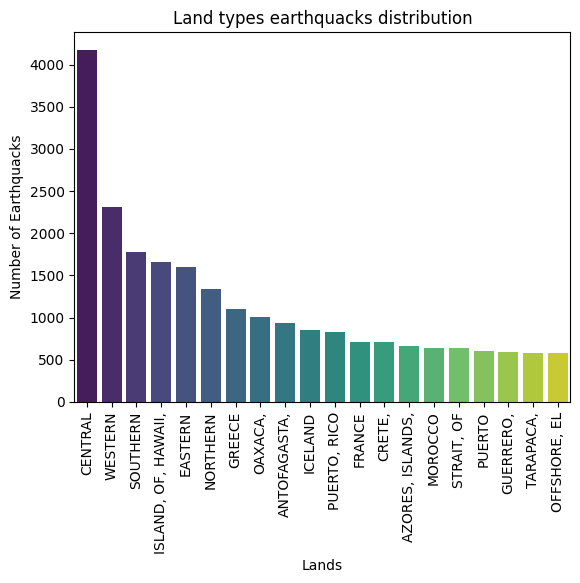

In [ ]:
# Impact on different land types
top_lands = 20
sns.countplot(x='Lands', data = df , order = df['Lands'].value_counts().index[:top_lands], palette = 'viridis')
plt.title('Land types earthquacks distribution')
plt.xlabel('Lands')
plt.ylabel('Number of Earthquacks')
plt.xticks(rotation=90)
plt.show()

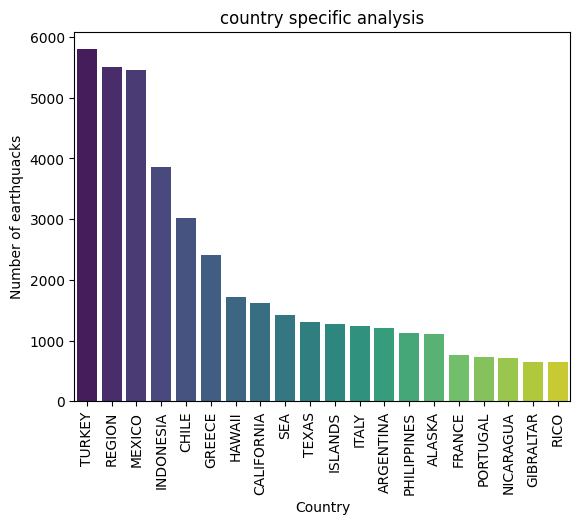

In [ ]:
# country specific analysis
top_countries = 20
sns.countplot(x='Country', data= df, order=df['Country'].value_counts().index[:top_countries], palette= 'viridis')
plt.title('country specific analysis')
plt.xlabel('Country')
plt.ylabel('Number of earthquacks')
plt.xticks(rotation=90)
plt.show()

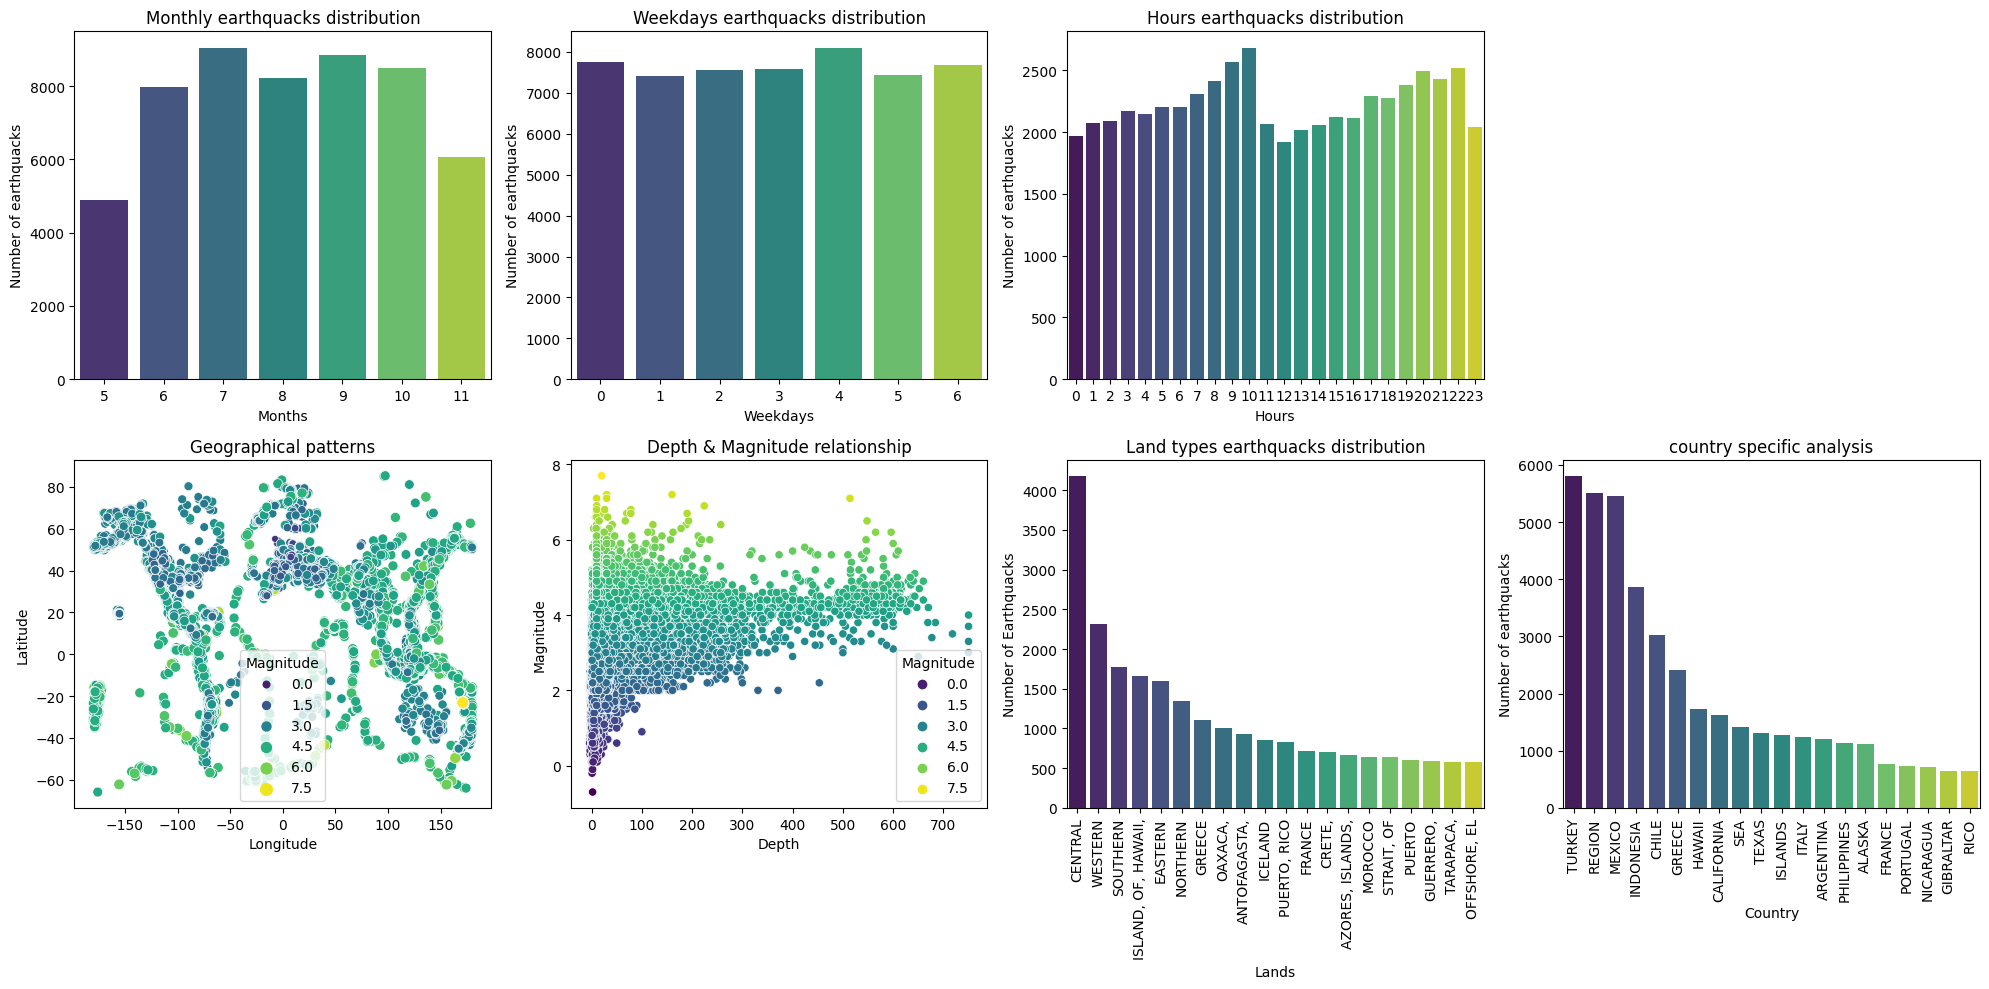

In [ ]:
# Dashboard of Earthwquakes 2023 analysis
fig, axes = plt.subplots(nrows=2, ncols = 4, figsize=(20,10))

# Monthly earthquacks distribution
sns.countplot(x='Month', data= df, palette='viridis', ax=axes[0,0])
axes[0,0].set_xlabel('Months')
axes[0,0].set_ylabel('Number of earthquacks')
axes[0,0].set_title('Monthly earthquacks distribution')

# Weekdays earthquacks distribution
sns.countplot(x='Weekday', data= df, palette='viridis', ax=axes[0,1])
axes[0,1].set_xlabel('Weekdays')
axes[0,1].set_ylabel('Number of earthquacks')
axes[0,1].set_title('Weekdays earthquacks distribution')

# Hourly earthquacks distribution
sns.countplot(x='Hour', data= df, palette='viridis', ax=axes[0,2])
axes[0,2].set_xlabel('Hours')
axes[0,2].set_ylabel('Number of earthquacks')
axes[0,2].set_title('Hours earthquacks distribution')

# Geographical patterns
sns.scatterplot(x='Longitude', y='Latitude', data=df, hue = 'Magnitude', palette= 'viridis', size= 'Magnitude', ax=axes[1,0])
axes[1,0].set_title('Geographical patterns')
axes[1,0].set_xlabel('Longitude')
axes[1,0].set_ylabel('Latitude')

# Depth & Magnitude relationship
sns.scatterplot(x='Depth', y='Magnitude', data= df, hue = 'Magnitude' , palette = 'viridis', ax=axes[1,1] )
axes[1,1].set_title('Depth & Magnitude relationship')
axes[1,1].set_xlabel('Depth')
axes[1,1].set_ylabel('Magnitude')

# Impact on different land types
top_lands = 20
sns.countplot(x='Lands', data = df , order = df['Lands'].value_counts().index[:top_lands], palette = 'viridis',ax=axes[1,2])
axes[1,2].set_title('Land types earthquacks distribution')
axes[1,2].set_xlabel('Lands')
axes[1,2].set_ylabel('Number of Earthquacks')
axes[1,2].tick_params(axis='x',rotation=90)

# country specific analysis
top_countries = 20
sns.countplot(x='Country', data= df, order=df['Country'].value_counts().index[:top_countries], palette= 'viridis', ax=axes[1,3])
axes[1,3].set_title('country specific analysis')
axes[1,3].set_xlabel('Country')
axes[1,3].set_ylabel('Number of earthquacks')
axes[1,3].tick_params(axis='x',rotation=90)

fig.delaxes(axes[0,-1])
plt.tight_layout()
plt.show()